# Часть 1. Визуальный анализ данных.

## Исходные данные

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

from sklearn import datasets

import warnings
warnings.simplefilter('ignore')


%matplotlib inline

matplotlib.rcParams['figure.figsize'] = 11.7,8.27

In [3]:
train = pd.read_csv('data/train_features_with_answers.csv')
X_test = pd.read_csv('data/X_test.csv')

In [4]:
train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         454 non-null    object 
 2   age         426 non-null    float64
 3   address     449 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Fedu        454 non-null    int64  
 8   Mjob        454 non-null    object 
 9   Fjob        454 non-null    object 
 10  reason      454 non-null    object 
 11  guardian    454 non-null    object 
 12  traveltime  454 non-null    int64  
 13  studytime   454 non-null    int64  
 14  failures    454 non-null    int64  
 15  schoolsup   454 non-null    object 
 16  famsup      454 non-null    object 
 17  paid        454 non-null    object 
 18  activities  454 non-null    object 
 19  nursery     454 non-null    o

In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      195 non-null    object
 1   sex         195 non-null    object
 2   age         195 non-null    int64 
 3   address     195 non-null    object
 4   famsize     195 non-null    object
 5   Pstatus     195 non-null    object
 6   Medu        195 non-null    int64 
 7   Fedu        195 non-null    int64 
 8   Mjob        195 non-null    object
 9   Fjob        195 non-null    object
 10  reason      195 non-null    object
 11  guardian    195 non-null    object
 12  traveltime  195 non-null    int64 
 13  studytime   195 non-null    int64 
 14  failures    195 non-null    int64 
 15  schoolsup   195 non-null    object
 16  famsup      195 non-null    object
 17  paid        195 non-null    object
 18  activities  195 non-null    object
 19  nursery     195 non-null    object
 20  higher    

_______________________________________________________________________________________________________________________________

## Характеристика: "Sex"

In [7]:
from random import choice

# Значения, которые не равны F или M заменяются случайно на F или M
new_train = train.copy()
indexes = new_train[~new_train['sex'].isin(['F', 'M'])].index
for ind in indexes:
    new_train.loc[ind, 'sex'] = choice(['F', 'M'])
new_train.loc[indexes]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
361,MS,M,16.0,U,GT3,T,2,1,other,services,...,yes,no,5,3,3,1,1,1,0,14
380,MS,F,16.0,R,GT3,T,1,1,at_home,other,...,yes,yes,4,2,2,4,3,2,0,14
395,GP,F,15.0,U,GT3,T,2,3,other,services,...,yes,yes,3,2,2,1,3,3,0,12
396,GP,F,17.0,U,GT3,T,1,1,at_home,services,...,yes,no,5,3,3,1,1,3,0,12
397,GP,F,16.0,U,GT3,T,3,2,other,other,...,yes,no,5,4,3,1,1,5,4,12
398,MS,F,17.0,R,GT3,T,2,2,other,other,...,yes,no,4,4,5,1,2,5,0,9
399,MS,M,16.0,R,GT3,T,2,3,at_home,services,...,no,no,4,5,2,1,2,5,0,17
401,GP,M,17.0,U,LE3,A,3,3,services,other,...,yes,no,5,3,3,1,1,5,0,13


In [8]:
sex_f = new_train[new_train['sex'] == 'F']
sex_m = new_train[new_train['sex'] == 'M']

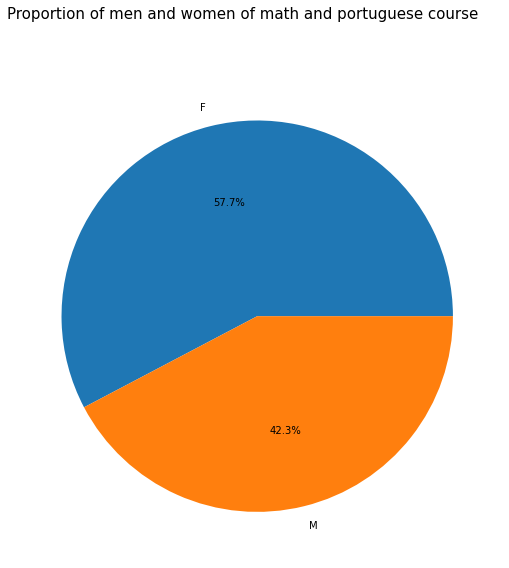

In [9]:
# Круговая диаграмма SEX

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Proportion of men and women of math and portuguese course', fontsize=15)

ax.pie([sex_f.shape[0], sex_m.shape[0]], labels=['F', 'M'], autopct='%1.1f%%')

plt.show()

_______________________________________________________________________________________________________________________________

## Характеристика: "Age"

In [10]:
# Отсутствующий и абсурдный возрат исправляем на значение среднего возраста из датасета
indexes = new_train[(new_train['age'].isnull() == True) | (new_train['age'] < 15) | (new_train['age'] > 22)].index
rounded_mean = round(new_train['age'].mean())
for ind in indexes:
    new_train.loc[ind ,'age'] = rounded_mean
new_train.loc[indexes]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,18.0,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,18.0,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
20,MS,F,18.0,R,GT3,T,2,3,at_home,services,...,yes,no,3,3,3,1,1,2,0,10
31,GP,F,18.0,U,LE3,T,3,3,other,other,...,yes,no,4,4,5,1,1,4,0,15
45,GP,M,18.0,U,GT3,T,4,4,teacher,services,...,yes,no,4,3,3,2,2,2,0,13
65,GP,F,18.0,U,GT3,T,2,1,services,other,...,yes,no,4,3,5,2,4,4,4,16
66,GP,F,18.0,U,LE3,A,3,3,other,services,...,yes,no,2,3,5,1,4,3,6,13
68,GP,M,18.0,U,GT3,T,3,3,services,other,...,yes,yes,4,2,3,1,2,3,0,13
69,MS,M,18.0,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,4,11
80,GP,F,18.0,U,GT3,T,3,2,at_home,other,...,yes,yes,4,3,4,1,2,2,5,17


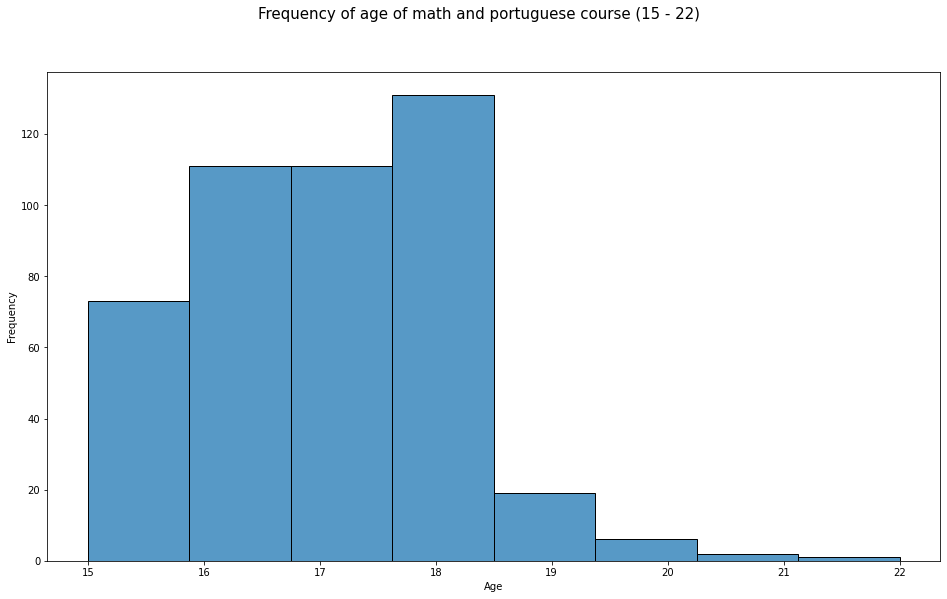

In [11]:
# Гистограмма AGE

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Frequency of age of math and portuguese course (15 - 22)', fontsize=15)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
sns.histplot(x='age', data=new_train, bins=8)


plt.show()

_______________________________________________________________________________________________________________________________

## Характеристика: "Weekly study time"

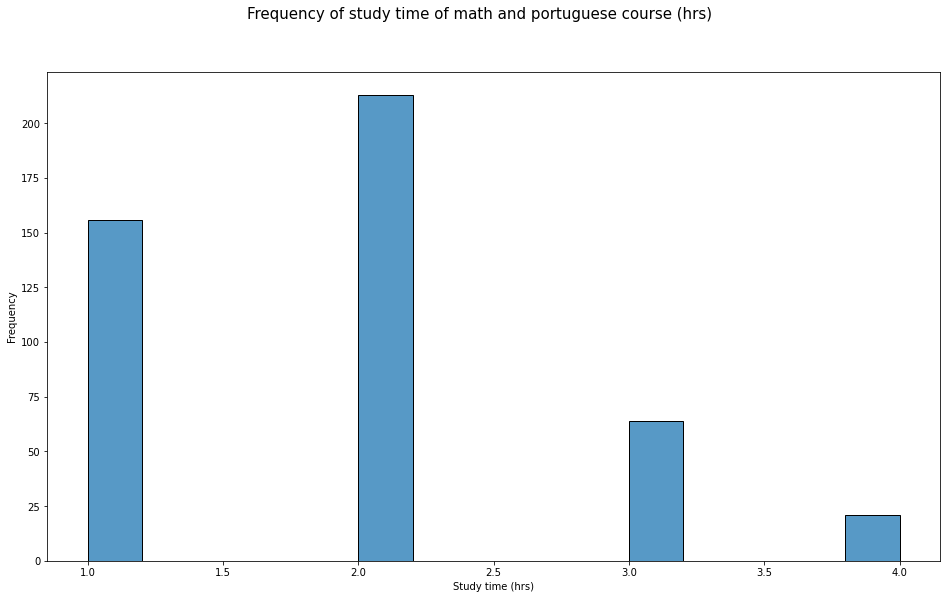

In [12]:
# Weekly study time
# Тут ничего исправлять не надо

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Frequency of study time of math and portuguese course (hrs)', fontsize=15)

ax.set_xlabel('Study time (hrs)')
ax.set_ylabel('Frequency')
sns.histplot(new_train['studytime'], bins=15)

plt.show()

_______________________________________________________________________________________________________________________________

## Характеристика: "Romantic Relationship"

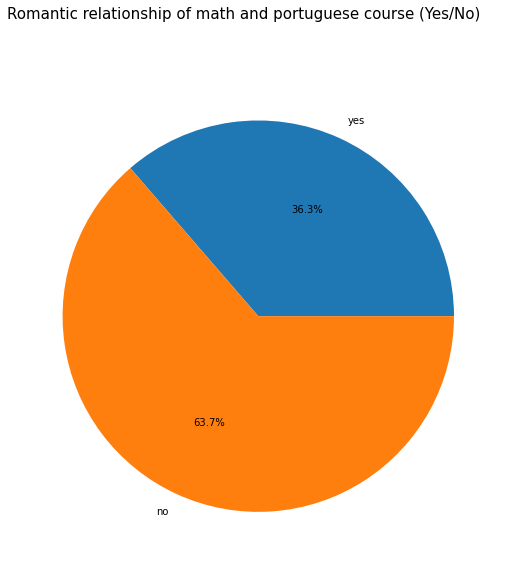

In [13]:
# Romantic relationship
# Пропусков в датасете нет
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Romantic relationship of math and portuguese course (Yes/No)', fontsize=15)

ax.pie([new_train[new_train['romantic'] == 'yes'].shape[0], 
        new_train[new_train['romantic'] == 'no'].shape[0]], 
        labels=new_train['romantic'].unique(), 
        autopct='%1.1f%%')

plt.show()

_______________________________________________________________________________________________________________________________

## Характеристика: "Alcohol Consumption"

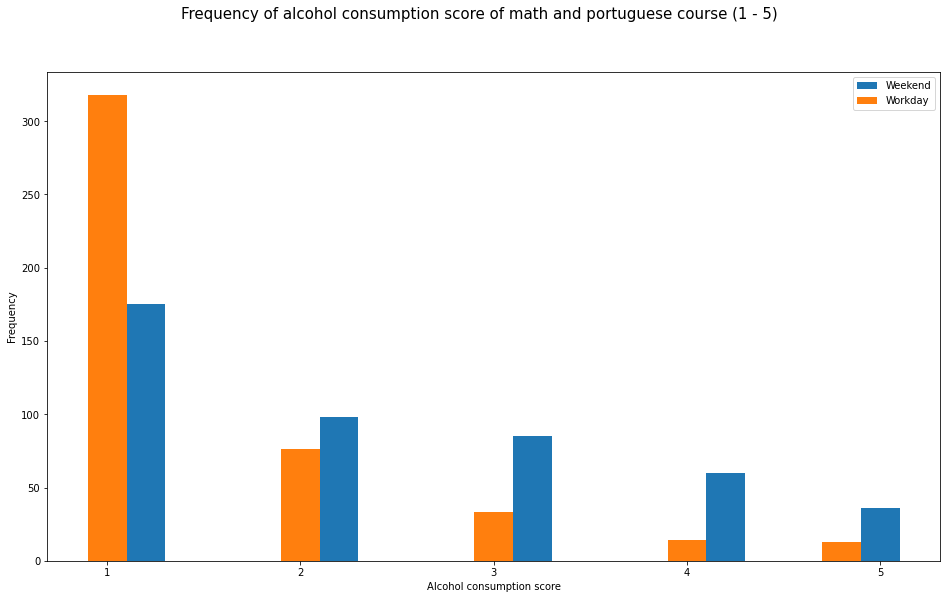

In [14]:
# Alcohol consumption

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Frequency of alcohol consumption score of math and portuguese course (1 - 5)', fontsize=15)

ax.set_xlabel('Alcohol consumption score')
ax.set_ylabel('Frequency')
ax.hist(new_train['Walc'] + 0.1, bins=20, width=0.2)
ax.hist(new_train['Dalc'] - 0.1, bins=20, width=0.2)
ax.legend(['Weekend', 'Workday'])


plt.show()

_______________________________________________________________________________________________________________________________

## Целевая зависимость: "G3" (Final Grade)

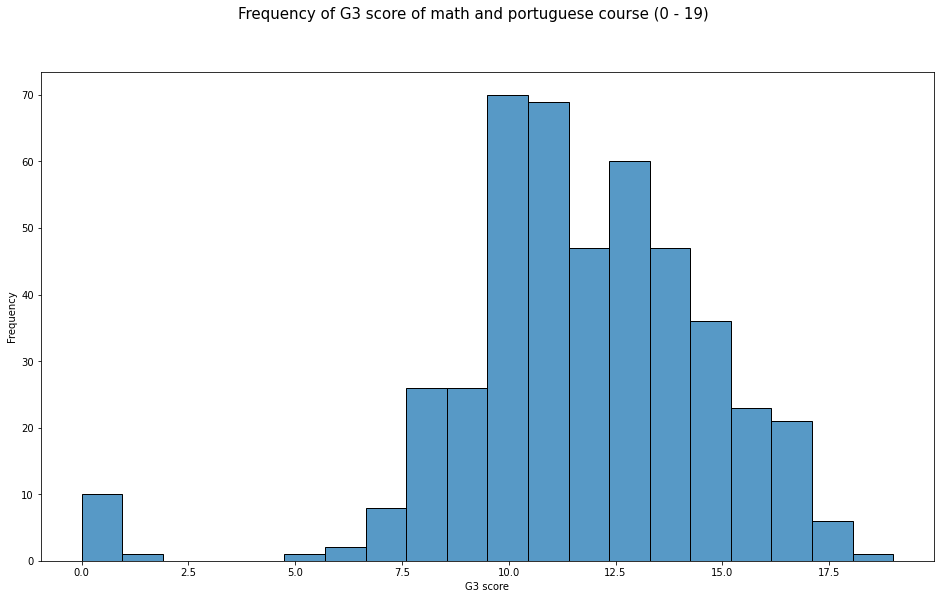

In [15]:
#"G3" (Final Grade)

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Frequency of G3 score of math and portuguese course (0 - 19)', fontsize=15)

ax.set_xlabel('G3 score')
ax.set_ylabel('Frequency')
sns.histplot(new_train['G3'], bins=20)


plt.show()

_______________________________________________________________________________________________________________________________

## Прочие характеристики

### Activities

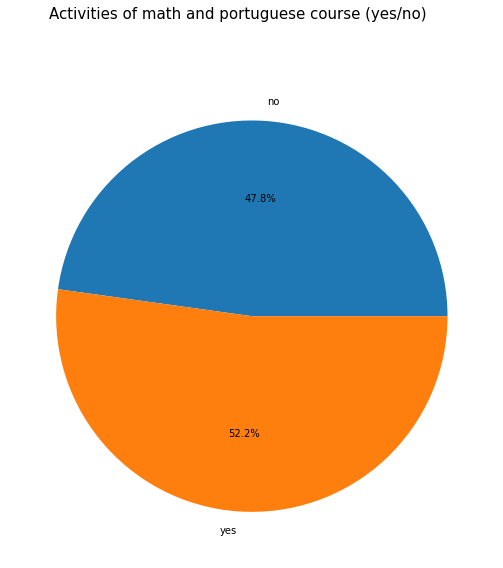

In [16]:
# Activities

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Activities of math and portuguese course (yes/no)', fontsize=15)

ax.pie([new_train[new_train['activities'] == 'yes'].shape[0], 
        new_train[new_train['activities'] == 'no'].shape[0]], 
        labels=new_train['activities'].unique(),
        autopct='%1.1f%%')


plt.show()

### Parents' cohabitation status

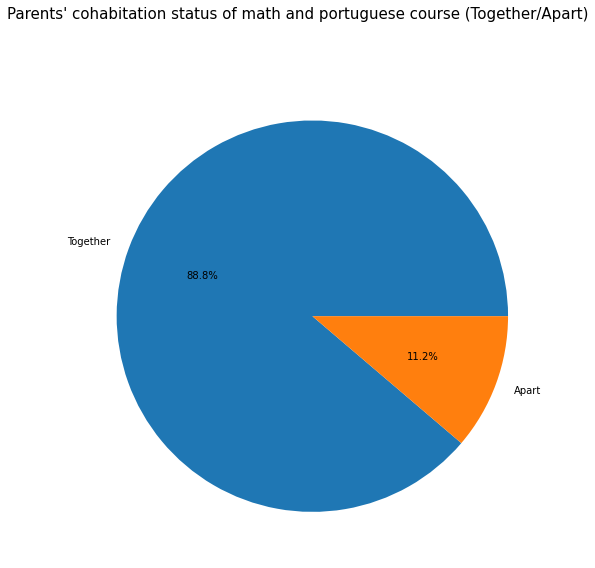

In [17]:
# Parents' cohabitation status

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Parents\' cohabitation status of math and portuguese course (Together/Apart)', fontsize=15)


ax.pie([new_train[new_train['Pstatus'] == 'T'].shape[0], 
        new_train[new_train['Pstatus'] == 'A'].shape[0]], 
        labels=['Together', 'Apart'],
        autopct='%1.1f%%')

plt.show()

### Absences

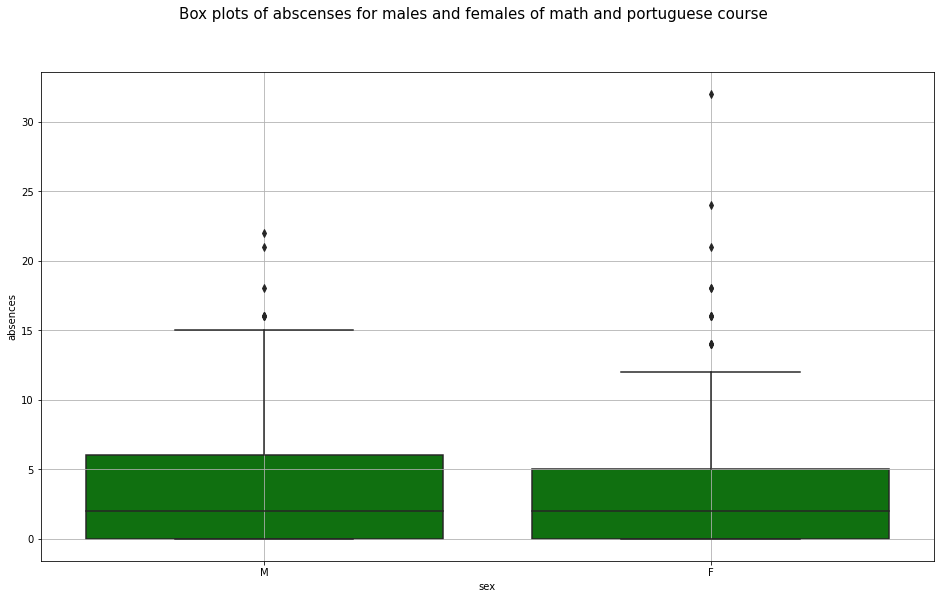

In [18]:
# Boxplots of G1 and G2

fig1, ax = plt.subplots(1, 1, figsize=(16, 9))
fig1.suptitle('Box plots of abscenses for males and females of math and portuguese course', fontsize=15)


sns.boxplot(y=new_train['absences'], x=new_train['sex'], data=new_train, color='green')
ax.grid()


plt.show()

### Health scores

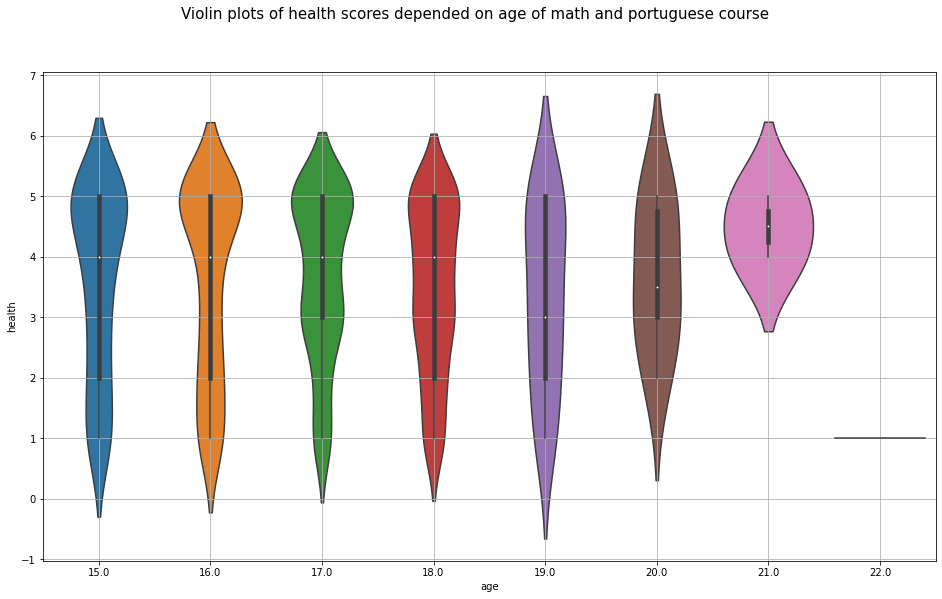

In [19]:
# Violin plots

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Violin plots of health scores depended on age of math and portuguese course', fontsize=15)

sns.violinplot(data=new_train, x=new_train['age'], y=new_train['health'])
ax.grid()

plt.show()

### Address

In [20]:
# Исправляем отсутствующие адреса

indexes = new_train[(new_train['address'].isnull() == True)].index
for ind in indexes:
    new_train.loc[ind ,'address'] = choice(['R', 'U'])
new_train.loc[indexes]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
2,GP,M,15.0,R,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
10,MS,M,15.0,U,LE3,T,4,1,health,services,...,yes,no,5,3,4,1,2,2,0,14
21,GP,M,17.0,U,LE3,T,1,1,other,services,...,no,yes,5,3,5,1,5,5,0,8
22,GP,F,16.0,U,GT3,T,1,2,other,other,...,yes,no,5,3,5,1,2,5,4,11
23,GP,F,15.0,R,GT3,T,4,4,teacher,services,...,yes,no,4,2,2,1,1,5,2,13


_______________________________________________________________________________________________________________________________

## Корреляция признаков

### Heatmap

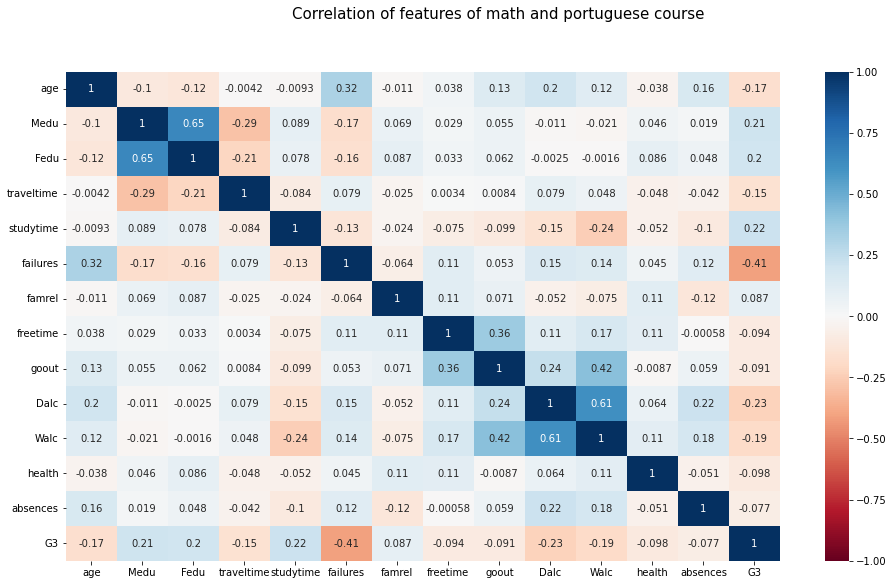

In [21]:
# Correlation

def correlation(new_train, size=(16, 9)):
    fig, ax = plt.subplots(1, 1, figsize=size)
    fig.suptitle('Correlation of features of math and portuguese course', fontsize=15)

    sns.heatmap(new_train.corr(),
               vmin=-1, vmax=1, annot=True, cmap='RdBu')

    plt.show()

correlation(new_train)

## Корреляция Спирмена

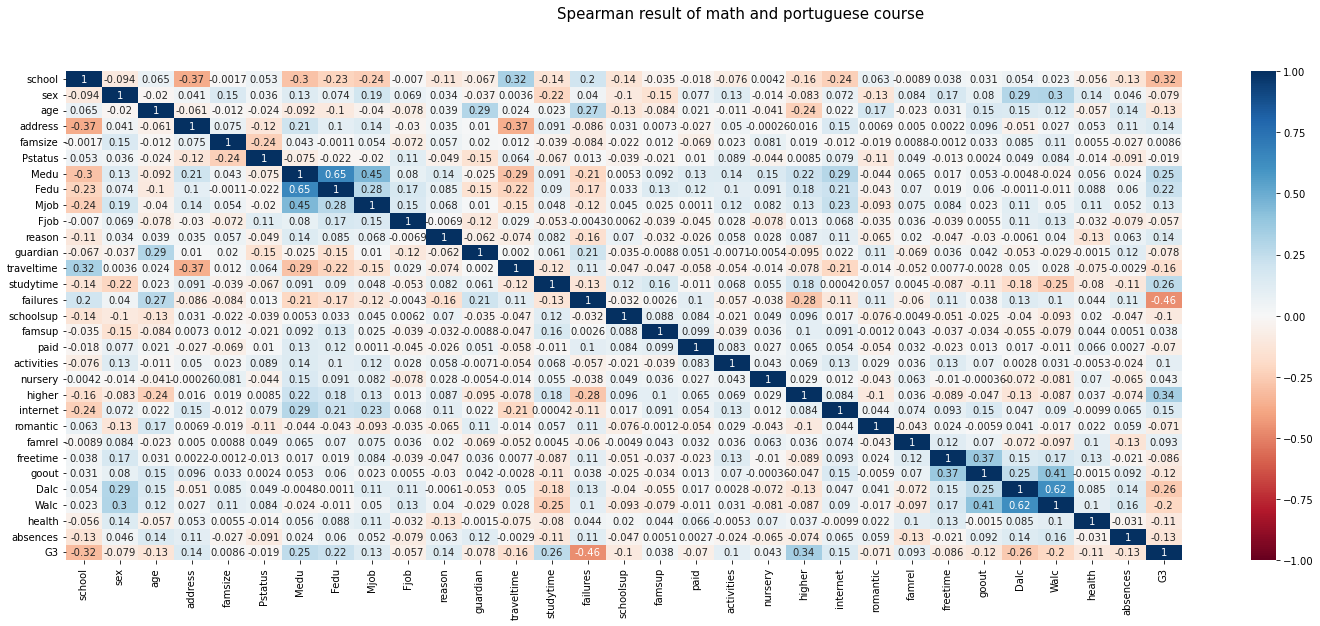

In [22]:
# Корреляция Спирмена
from scipy.stats import spearmanr as spr

def spearman(new_train):
    spr_nt = spr(new_train)

    fig, ax = plt.subplots(figsize=(25, 9))
    fig.suptitle('Spearman result of math and portuguese course', fontsize=15)

    sns.heatmap(spr_nt[0],
               vmin=-1, vmax=1, annot=True, cmap='RdBu', 
               xticklabels=[*new_train.columns],
               yticklabels=[*new_train.columns])

    plt.show()

spearman(new_train)

## Количесво уникальных значений характеристик

In [23]:
# Unique values of features
for column in new_train.columns:
    print(f'{column} - {new_train[column].unique()} - {len(new_train[column].unique())}')

school - ['MS' 'GP'] - 2
sex - ['M' 'F'] - 2
age - [18. 15. 17. 20. 16. 19. 21. 22.] - 8
address - ['U' 'R'] - 2
famsize - ['LE3' 'GT3'] - 2
Pstatus - ['T' 'A'] - 2
Medu - [1 3 4 2 0] - 5
Fedu - [3 4 1 2 0] - 5
Mjob - ['at_home' 'teacher' 'other' 'services' 'health'] - 5
Fjob - ['services' 'other' 'at_home' 'teacher' 'health'] - 5
reason - ['course' 'home' 'reputation' 'other'] - 4
guardian - ['mother' 'father' 'other'] - 3
traveltime - [1 3 2 4] - 4
studytime - [1 2 3 4] - 4
failures - [0 1 2 3] - 4
schoolsup - ['no' 'yes'] - 2
famsup - ['no' 'yes'] - 2
paid - ['no' 'yes'] - 2
activities - ['no' 'yes'] - 2
nursery - ['yes' 'no'] - 2
higher - ['no' 'yes'] - 2
internet - ['yes' 'no'] - 2
romantic - ['yes' 'no'] - 2
famrel - [4 3 5 1 2] - 5
freetime - [3 5 2 1 4] - 5
goout - [3 4 1 5 2] - 5
Dalc - [2 3 1 5 4] - 5
Walc - [3 5 1 2 4] - 5
health - [3 5 2 1 4] - 5
absences - [ 0 16  4  8  2  1  9  6  5 11  3 10 12 14 18 15 24 22 32 21 13  7] - 22
G3 - [ 9 12 13 11 14 16 10 17  8 15  0  6  7 

_______________________________________________________________________________________________________________________________

## Соотношение мужского и женского пола для самых высоких оценок (G3), у которых время на дорогу больше 30 минут. 
## Отображение распределения на круговой диаграмме.


In [24]:
# Взял числа, которые > 13 из распределения оценок, т.к. там наблюдается падение частоты после значения 13
rel_male_m = new_train[(new_train['sex'] == 'M') & (new_train['traveltime'] >= 3) & (new_train['G3'] > 13)]
rel_female_m = new_train[(new_train['sex'] == 'F') & (new_train['traveltime'] >= 3) & (new_train['G3'] > 13)]

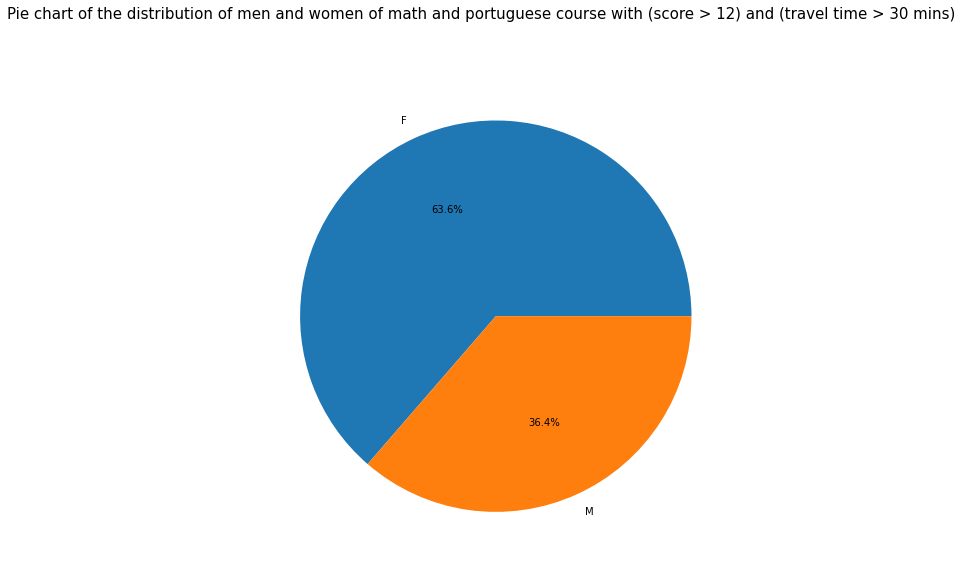

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Pie chart of the distribution of men and women of math and portuguese course with ' \
             '(score > 12) and (travel time > 30 mins)', fontsize=15)

ax.pie([rel_female_m.shape[0], rel_male_m.shape[0]], labels=['F', 'M'], autopct='%1.1f%%')


plt.show()

_______________________________________________________________________________________________________________________________

## Box plot для оценок по возрасту

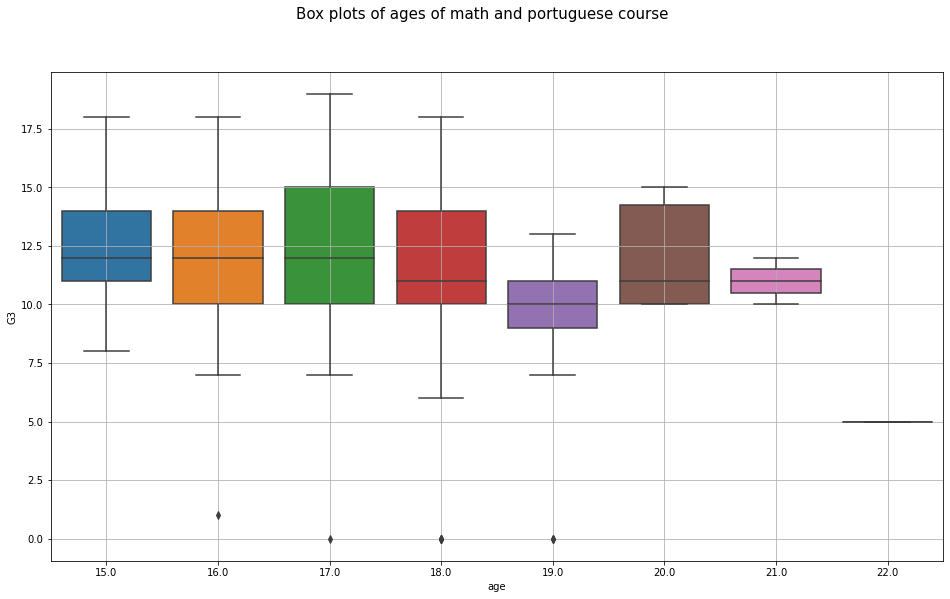

In [26]:
# Boxplot age

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
fig.suptitle('Box plots of ages of math and portuguese course', fontsize=15)

sns.boxplot(y=new_train['G3'], x=new_train['age'], data=new_train)
ax.grid()


plt.show()

_______________________________________________________________________________________________________________________________

## id ТОП-5 самых юных отличников

In [27]:
# id TOP-5 отличников (score >= 17 , сортировка возраста -  по возрастанию, а оценки - по убыванию)
# Я взял оценку 17 и выше, т.к. не сказано, сколько нужно на "отлично"
top_s = new_train[new_train['G3'] >= 17].sort_values(['age', 'G3'], ascending=[True, False])

print('Excellent students: ', end='')
print(*top_s[:5].index)
top_s


Excellent students: 109 197 151 32 251


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
109,GP,M,15.0,U,LE3,T,4,2,teacher,other,...,yes,no,3,5,2,1,1,3,10,18
197,GP,M,15.0,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,17
151,MS,F,16.0,R,LE3,T,1,1,at_home,other,...,no,no,5,3,2,1,1,1,0,18
32,GP,F,16.0,U,GT3,T,4,4,health,other,...,yes,no,4,4,4,1,2,2,6,17
251,GP,F,16.0,U,GT3,T,4,4,health,health,...,yes,yes,4,4,2,1,1,3,0,17
349,GP,M,16.0,U,GT3,T,4,3,health,services,...,yes,no,4,2,2,1,1,2,2,17
399,MS,M,16.0,R,GT3,T,2,3,at_home,services,...,no,no,4,5,2,1,2,5,0,17
74,GP,F,17.0,R,LE3,T,3,1,services,other,...,no,no,3,1,2,1,1,3,0,19
221,GP,M,17.0,U,LE3,A,3,2,other,other,...,yes,no,4,4,4,1,2,5,10,18
294,GP,M,17.0,R,GT3,T,1,2,at_home,at_home,...,no,yes,3,5,2,2,2,1,2,18


_______________________________________________________________________________________________________________________________

## Max и Min оценка (G3) для каждого возраста

In [28]:
# Max and Min score for each age

dict_of_data = {}
for age in new_train['age'].unique():
    dict_of_data[age] = [max(new_train['G3'][new_train['age'] == age]), min(new_train['G3'][new_train['age'] == age])]

In [29]:
dict_of_data = dict(sorted(dict_of_data.items(), key=lambda x: x[0]))
for key, value in dict_of_data.items():
    print('Для возраста ' + str(key) + ' максимальная оценка: ' + str(value[0]) + ', а минимальная: ' + str(value[1]))

Для возраста 15.0 максимальная оценка: 18, а минимальная: 8
Для возраста 16.0 максимальная оценка: 18, а минимальная: 1
Для возраста 17.0 максимальная оценка: 19, а минимальная: 0
Для возраста 18.0 максимальная оценка: 18, а минимальная: 0
Для возраста 19.0 максимальная оценка: 13, а минимальная: 0
Для возраста 20.0 максимальная оценка: 15, а минимальная: 10
Для возраста 21.0 максимальная оценка: 12, а минимальная: 10
Для возраста 22.0 максимальная оценка: 5, а минимальная: 5


_______________________________________________________________________________________________________________________________

# Часть 2. Предобработка данных.


## Удалим скоррелированные признаки

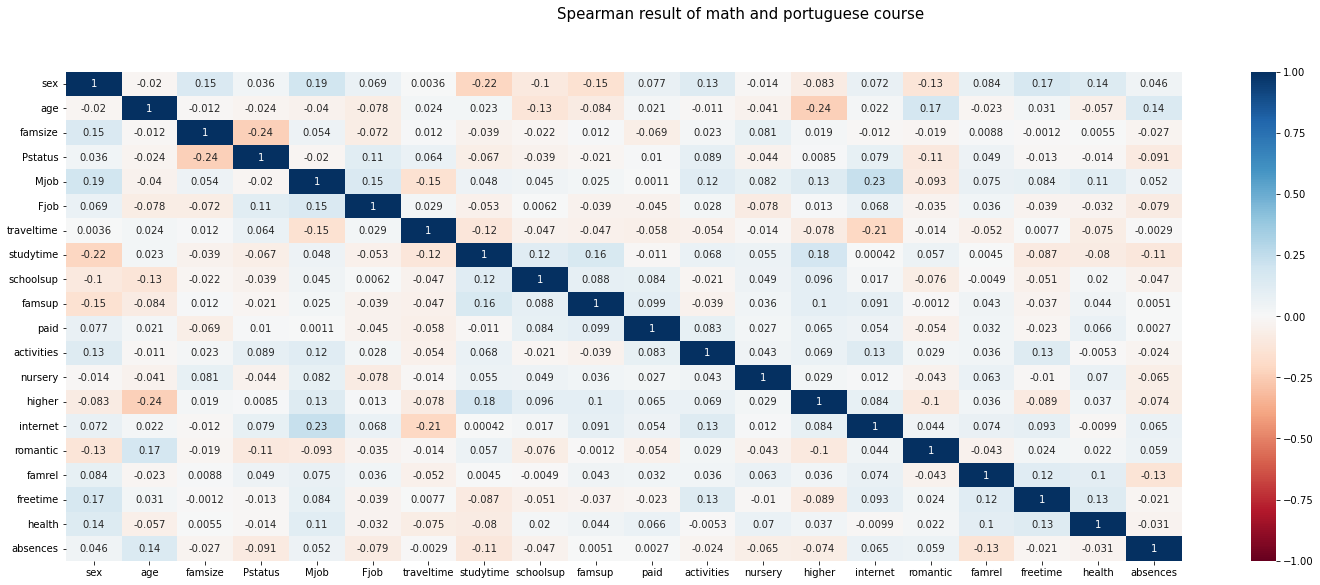

In [30]:
train_dropped = new_train.copy()
Y_train = train_dropped['G3']
train_dropped = train_dropped.drop(columns=['Fedu', 'Medu', 'Walc', 'Dalc', 'goout', 'G3', 'address', 'failures', 'school', 'guardian', 'reason'])
spearman(train_dropped)

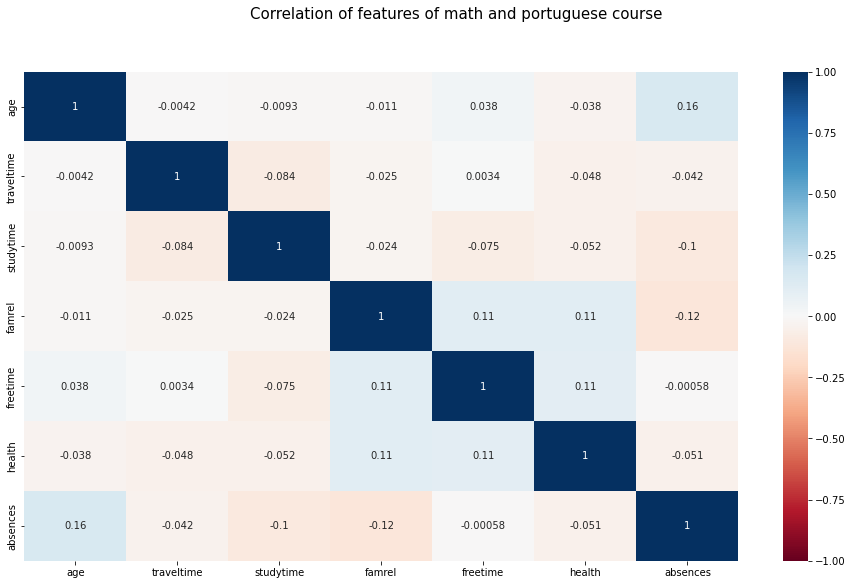

In [31]:
correlation(train_dropped)

## Ищем пропуски в данных

In [32]:
# Уже все нашел и почистил
print(train_dropped.isnull().sum(), end='\n\n')
for column in train_dropped.columns:
    print(f'{column} - {train_dropped[column].unique()} - {len(train_dropped[column].unique())}')

sex           0
age           0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
health        0
absences      0
dtype: int64

sex - ['M' 'F'] - 2
age - [18. 15. 17. 20. 16. 19. 21. 22.] - 8
famsize - ['LE3' 'GT3'] - 2
Pstatus - ['T' 'A'] - 2
Mjob - ['at_home' 'teacher' 'other' 'services' 'health'] - 5
Fjob - ['services' 'other' 'at_home' 'teacher' 'health'] - 5
traveltime - [1 3 2 4] - 4
studytime - [1 2 3 4] - 4
schoolsup - ['no' 'yes'] - 2
famsup - ['no' 'yes'] - 2
paid - ['no' 'yes'] - 2
activities - ['no' 'yes'] - 2
nursery - ['yes' 'no'] - 2
higher - ['no' 'yes'] - 2
internet - ['yes' 'no'] - 2
romantic - ['yes' 'no'] - 2
famrel - [4 3 5 1 2] - 5
freetime - [3 5 2 1 4] - 5
health - [3 5 2 1 4] - 5
absences - [ 0 16  4  8  2  1  9  6  5 11  3 10 12 14 18 15 24 22 32 21 13  7] -

## Закодируем категориальные признаки

In [33]:
# Выделим категориальные признаки
def cat_data(train_dropped):
    object_data = []
    binary_data = []
    for i in train_dropped:
        if (train_dropped[i].dtype == 'object') & (len(train_dropped[i].unique()) != 2):
            object_data.append(i)
        if (len(train_dropped[i].unique()) == 2):
            binary_data.append(i)
    return object_data,  binary_data
            
object_data,  binary_data = cat_data(train_dropped)

In [34]:
# Кодируем категориальные признаки
from sklearn.preprocessing import LabelEncoder


def encode_data(train_dropped, object_data,  binary_data):
    le = LabelEncoder()

    encoded_data = train_dropped.copy()
    encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data[list(set(object_data) & set(train_dropped))])], axis=1)
    encoded_data.drop(list(set(object_data) & set(train_dropped)), inplace=True, axis=1)
    for i in list(set(binary_data) & set(train_dropped)) :
        encoded_data[i] = le.fit_transform(encoded_data[i])
    return encoded_data

encoded_data = encode_data(train_dropped, object_data,  binary_data)
encoded_data

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,1,18.0,1,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,18.0,1,1,3,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,1,15.0,0,1,1,2,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,17.0,0,1,2,2,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
4,0,20.0,0,1,2,2,0,1,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,1,15.0,0,1,1,4,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
450,0,15.0,0,1,1,4,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
451,1,16.0,0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
452,0,15.0,1,1,2,2,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


## Придумаем сложные признаки

In [35]:
def not_simple(encoded_data):

    X_train = encoded_data.copy()
    X_train = X_train.assign(non_linear_1 = np.sqrt((np.exp(encoded_data['age'])) **
                                                                         (encoded_data['Pstatus'] *
                                                                          encoded_data['activities'] *
                                                                          encoded_data['traveltime'] + 1))
                                 )
    X_train = X_train.assign(non_linear_2 = np.exp(encoded_data['age']) * 
                                                np.exp(encoded_data['health']) * 
                                                np.exp(encoded_data['freetime']) ** (encoded_data['sex'] + 1)
                                )
    return X_train

X_train = not_simple(encoded_data)

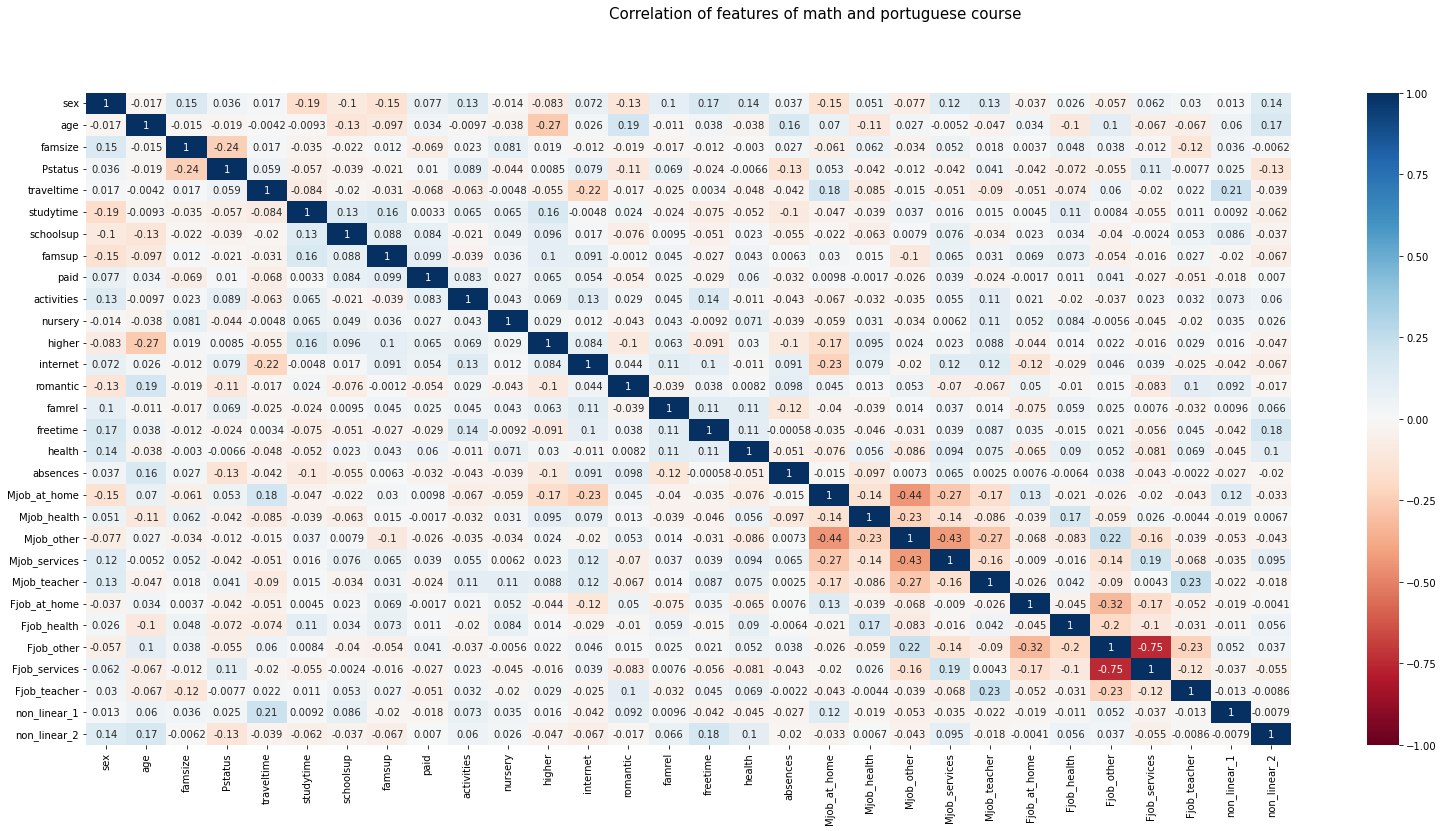

In [36]:
correlation(X_train, (27, 12))

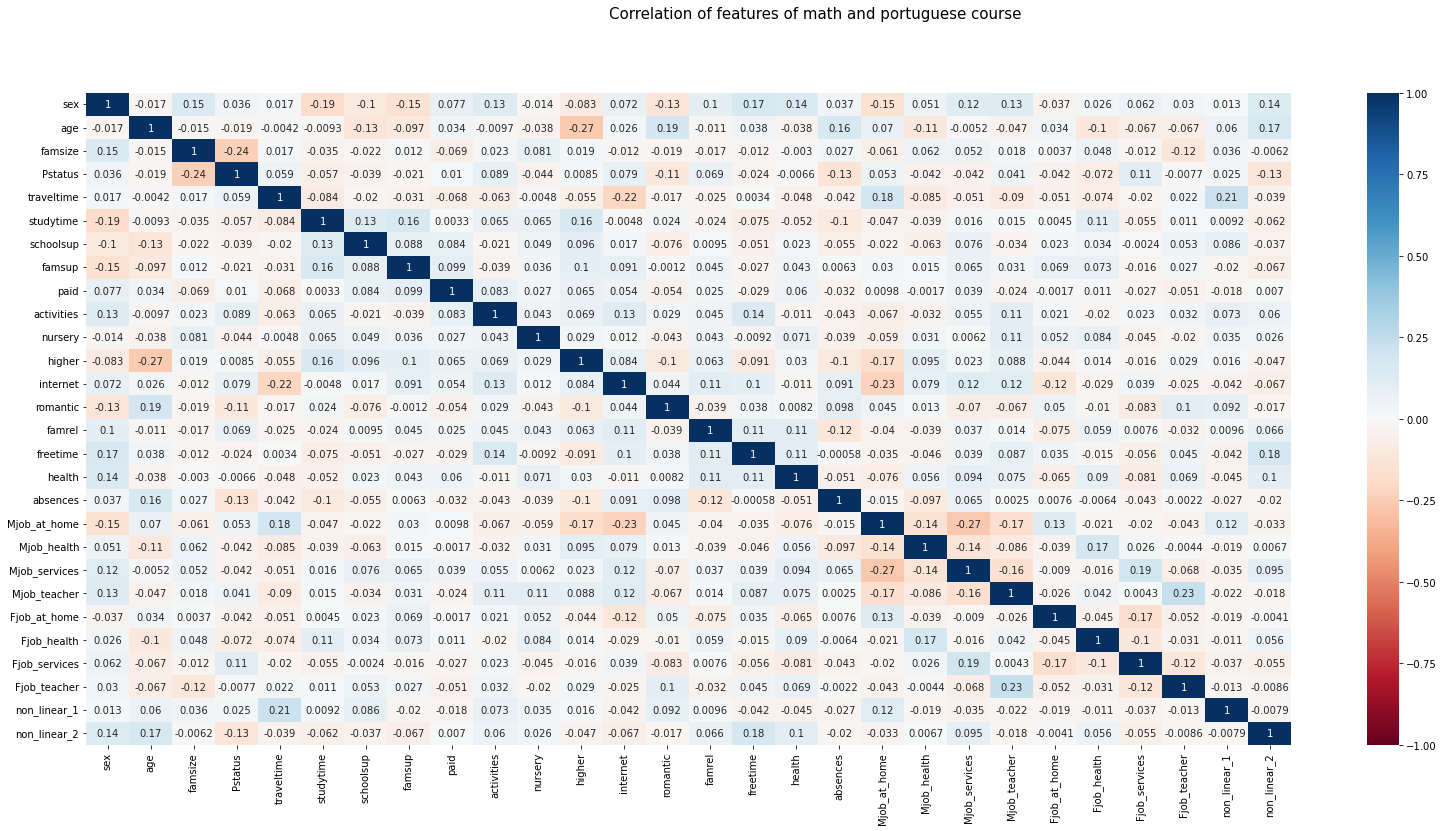

In [37]:
X_train = X_train.drop(columns=['Mjob_other', 'Fjob_other'])
correlation(X_train, (27, 12))

In [38]:
X_train.columns

Index(['sex', 'age', 'famsize', 'Pstatus', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher',
       'non_linear_1', 'non_linear_2'],
      dtype='object')

_______________________________________________________________________________________________________________________________

# Часть 3. Стратегия валидации.

## Предобработка X_test (понадобится в будущем)

In [39]:
# Предварительно обработаем тестовый датасет и подгоним его под тренировочный

X_test = X_test.drop(columns=['guardian', 'reason'])
object_data,  binary_data = cat_data(X_test)
X_test = encode_data(X_test, object_data,  binary_data)
X_test = not_simple(X_test)
X_test = X_test.drop(columns=['Mjob_other', 'Fjob_other'])
X_test = X_test.drop(columns=['Fedu', 'Medu', 'Walc', 'Dalc', 'goout', 'address', 'failures', 'school'])

## Кросс-валидация

In [40]:
# Разделяю данные KFold'ом на 5 кусков с перемешиванием
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, random_state=None, shuffle=True)
kf.get_n_splits(X_train)

6

_______________________________________________________________________________________________________________________________

# Часть 4. Заполнение пропусков в данных

In [41]:
# Пропусков данных нет
for column in X_train.columns:
    print(column, X_train[column].unique())
    
print(X_train.isnull().sum())

sex [1 0]
age [18. 15. 17. 20. 16. 19. 21. 22.]
famsize [1 0]
Pstatus [1 0]
traveltime [1 3 2 4]
studytime [1 2 3 4]
schoolsup [0 1]
famsup [0 1]
paid [0 1]
activities [0 1]
nursery [1 0]
higher [0 1]
internet [1 0]
romantic [1 0]
famrel [4 3 5 1 2]
freetime [3 5 2 1 4]
health [3 5 2 1 4]
absences [ 0 16  4  8  2  1  9  6  5 11  3 10 12 14 18 15 24 22 32 21 13  7]
Mjob_at_home [1 0]
Mjob_health [0 1]
Mjob_services [0 1]
Mjob_teacher [0 1]
Fjob_at_home [0 1]
Fjob_health [0 1]
Fjob_services [1 0]
Fjob_teacher [0 1]
non_linear_1 [8.10308393e+03 4.31123155e+15 3.26901737e+06 1.18716009e+11
 1.06864746e+13 2.41549528e+07 6.56599691e+07 4.91476884e+03
 2.64891221e+10 5.32048241e+11 2.98095799e+03 7.89629602e+13
 2.86757959e+18 1.80804241e+03 8.88611052e+06 1.33597268e+04
 2.35385267e+17 5.91052206e+09 3.18559318e+16 5.83461743e+14
 2.20264658e+04 1.78482301e+08 1.31881573e+09 5.98741417e+04
 2.38447478e+12 1.93215993e+16 3.49342711e+19 4.78934563e+13]
non_linear_2 [5.32048241e+11 1.06864746e

# Часть 5. Обучение алгоритма

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import mean_squared_error as mse_score

ROUND = np.vectorize(round)
knnc = KNN(n_neighbors=50)
scores = []
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    knnc = knnc.fit(x_train, y_train)
    y_pred = ROUND(knnc.predict(x_test))
    #print(list(y_pred), list(y_test), end='\n\n', sep='\n')
    print('MSE:', mse_score(y_test, y_pred), end='\n\n')
    scores.append(mse_score(y_test, y_pred))

print(np.array([scores]).mean())

MSE: 11.776315789473685

MSE: 11.263157894736842

MSE: 7.184210526315789

MSE: 15.355263157894736

MSE: 10.066666666666666

MSE: 9.16

10.800935672514619


## Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
scores = []
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    bayes = bayes.fit(x_train, y_train)
    y_pred = ROUND(bayes.predict(x_test))
    #print(list(y_pred), list(y_test), end='\n\n', sep='\n')
    print('MSE:', mse_score(y_test, y_pred), end='\n\n')
    scores.append(mse_score(y_test, y_pred))

print(np.array([scores]).mean())

MSE: 12.171052631578947

MSE: 8.592105263157896

MSE: 11.105263157894736

MSE: 12.289473684210526

MSE: 15.813333333333333

MSE: 13.853333333333333

12.304093567251462


## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Linear Regression
regression = LinearRegression(n_jobs=-1)
scores = []
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    regression = regression.fit(x_train, y_train)
    y_pred = ROUND(regression.predict(x_test))
    #print(list(y_pred), list(y_test), end='\n\n', sep='\n')
    print('MSE:', mse_score(y_test, y_pred), end='\n\n')
    scores.append(mse_score(y_test, y_pred))
    
print(np.array([scores]).mean())

MSE: 13.921052631578947

MSE: 12.605263157894736

MSE: 5.2368421052631575

MSE: 8.473684210526315

MSE: 19.746666666666666

MSE: 8.44

11.40391812865497


## SVM

In [45]:
from sklearn.svm import SVC

svm = SVC()
scores = []
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    svm = svm.fit(x_train, y_train)
    y_pred = ROUND(svm.predict(x_test))
    #print(list(y_pred), list(y_test), end='\n\n', sep='\n')
    print('MSE:', mse_score(y_test, y_pred), end='\n\n')
    scores.append(mse_score(y_test, y_pred))

print(np.array([scores]).mean())

MSE: 14.18421052631579

MSE: 11.25

MSE: 8.31578947368421

MSE: 12.06578947368421

MSE: 13.053333333333333

MSE: 16.12

12.498187134502926


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

In [919]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve